In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import sys
sys.path.insert(0, '../mvTCR')
import tcr_embedding.utils_training as utils

In [2]:
# Put the .h5ad file read below in a folder named 'data' and put the folder 'data' in the 'mvTCR' folder.
# This way you won't get an error from the utils.load_data function
adata = utils.load_data('09_tcr_annotation_A_B_with_gender_data.h5ad')
#Put the best_model_by_metric.pt file in the mvTCR folder
model = utils.load_model(adata, path_model = 'best_model_by_metric.pt')

In [3]:
adata.obs.columns

Index(['Sample', 'donor', 'organ', 'sort', 'method', 'file', 'is_TRA_p',
       'is_TRB_p', 'is_TRA_np', 'is_TRB_np', 'Age', 'Source', 'cell types',
       'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'multi_chain',
       'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus',
       'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3',
       'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt',
       'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr',
       'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw',
       'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene',
       'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene',
       'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene',
       'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene',
       'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene',
       'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene',
       'IR_VJ_1_junction_ins', 'IR_VJ_2_ju

In [4]:
latent_moe = model.get_latent(adata, metadata=['clonotype', 'Age', 'Source', 'Sample'], return_mean=True)

In [5]:
latent_moe.obs.columns

Index(['batch', 'clonotype', 'Age', 'Source', 'Sample'], dtype='object')

In [6]:
sc.pp.neighbors(latent_moe, use_rep='X')

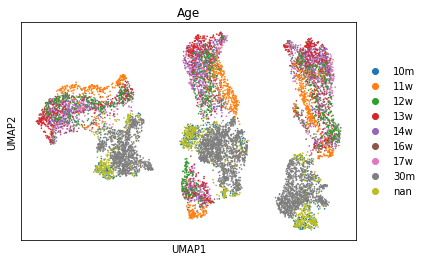

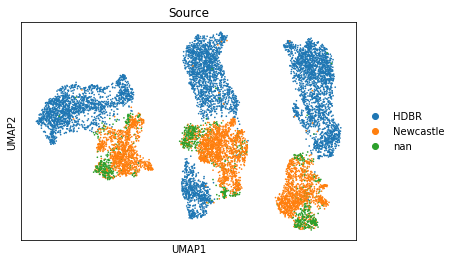

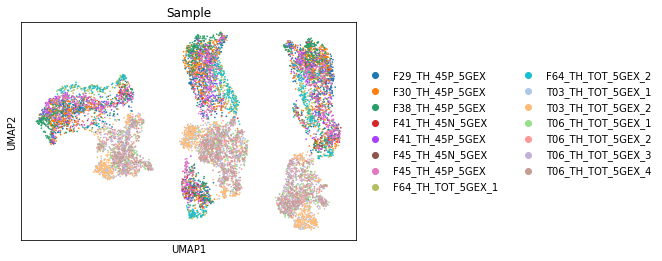

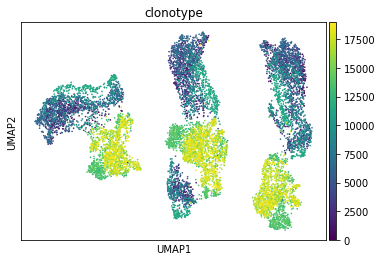

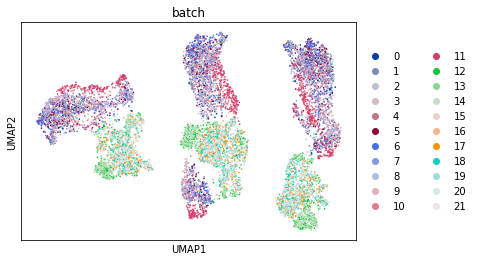

In [7]:
sc.tl.umap(latent_moe)
sc.pl.umap(latent_moe, color='Age')
sc.pl.umap(latent_moe, color='Source')
sc.pl.umap(latent_moe, color='Sample')
sc.pl.umap(latent_moe, color='clonotype')
sc.pl.umap(latent_moe, color='batch')